In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data[:, [0, 9]]  # Use of two features: Alcohol (0) and Color Intensity (9)
y = wine.target

# Checking the shape of the feature data (X) and target labels (y)
print("Shape of feature data (X):", X.shape)
print("Shape of target labels (y):", y.shape)


Shape of feature data (X): (178, 2)
Shape of target labels (y): (178,)


In [3]:
# Show the first 5 rows of X and y
print("First 5 rows of feature data (X):")
print(X[:5])

print("\nFirst 5 rows of target labels (y):")
print(y[:5])

# Show the last 5 rows of X and y
print("\nLast 5 rows of feature data (X):")
print(X[-5:])

print("\nLast 5 rows of target labels (y):")
print(y[-5:])


First 5 rows of feature data (X):
[[14.23  5.64]
 [13.2   4.38]
 [13.16  5.68]
 [14.37  7.8 ]
 [13.24  4.32]]

First 5 rows of target labels (y):
[0 0 0 0 0]

Last 5 rows of feature data (X):
[[13.71  7.7 ]
 [13.4   7.3 ]
 [13.27 10.2 ]
 [13.17  9.3 ]
 [14.13  9.2 ]]

Last 5 rows of target labels (y):
[2 2 2 2 2]


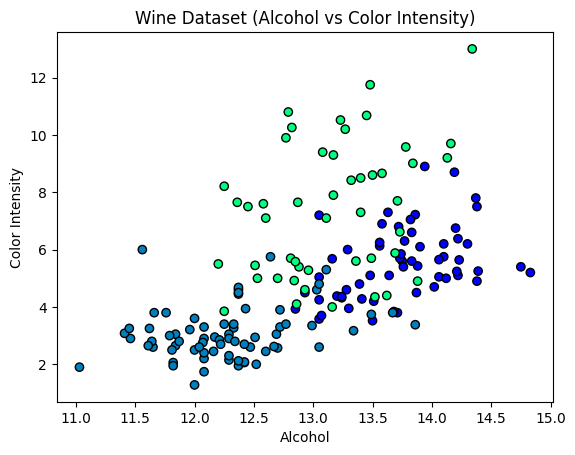

In [4]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolors='k', marker='o')
plt.title("Wine Dataset (Alcohol vs Color Intensity)")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()


In [5]:
# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [7]:
# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.94      0.94      0.94        18
           2       0.73      0.67      0.70        12

    accuracy                           0.80        45
   macro avg       0.79      0.78      0.78        45
weighted avg       0.80      0.80      0.80        45

Confusion Matrix:
 [[11  1  3]
 [ 1 17  0]
 [ 4  0  8]]


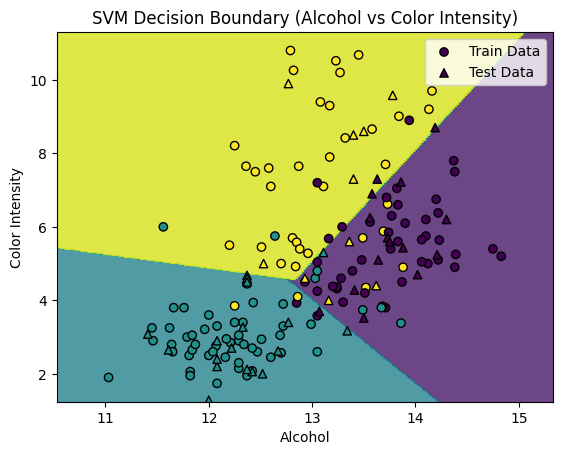

In [8]:
# Plotting the decision boundary (for 2D features)
h = .02
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the grid to plot decision boundary
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', edgecolors='k', label='Test Data')
plt.title("SVM Decision Boundary (Alcohol vs Color Intensity)")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.legend()

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
